In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from utils import *

In [2]:
Ns = [100, 500, 1000]    # 50, 100, 200, 500, 1000
sigmas = [1, 2, 10]
U = {N: np.zeros((N, len(sigmas))) for N in Ns}
for N in Ns:
    for i, sigma in enumerate(sigmas):
        data = scipy.io.loadmat(f'./data/fig5/sigma{sigma}/histo{N}.mat')
        U[N][:, i] = data[f'u{N}'][:, 0]

Bins = [10, 13, 16]

In [3]:
def ax_plot(ax, plot_U, bins):
    counts, bins = np.histogram(plot_U, bins=bins)
    probabilities = counts / counts.sum()

    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_width = bins[1] - bins[0]
    ax.bar(bin_centers, probabilities, width=bin_width, color='skyblue', edgecolor='black', label='Q')
    ax.plot(bin_centers, probabilities, color='k', linewidth=2, label='Broken line fitting')

    mean = np.mean(plot_U)
    std  = np.std(plot_U)

    gaussian = bin_width * np.exp(-0.5*(bin_centers-mean)**2 /std**2) / np.sqrt((2*np.pi*std**2))
    ax.plot(bin_centers, gaussian, color='r', linestyle='--', linewidth=2, label='Gaussian fitting')

    ax.set_yticks(np.arange(0, max(probabilities)+0.05, 0.05))
    ax.grid(True, alpha=0.3)

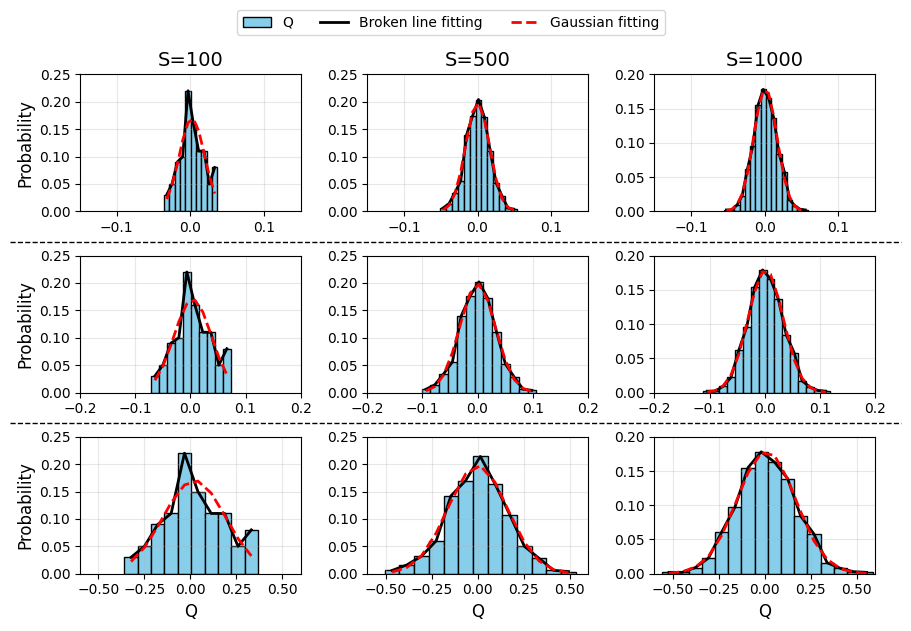

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(9, 6))
fig.subplots_adjust(
    left=0.1,  
    right=0.8, 
    top=0.9,  
    bottom=0.2,
    wspace=0.025, 
    hspace=0.05
    )

for i in range(3):
    for j in range(3):
        plot_U = U[Ns[j]][:, i]
        ax_plot(ax[i,j], plot_U, Bins[j])

title_fontsize = 14
label_fontsize = 12
ax[0,0].set_title(f'S={Ns[0]}', fontsize=title_fontsize)
ax[0,1].set_title(f'S={Ns[1]}', fontsize=title_fontsize)
ax[0,2].set_title(f'S={Ns[2]}', fontsize=title_fontsize)

for k in range(3):
    ax[k,0].set_ylabel('Probability', fontsize=label_fontsize)
    ax[2,k].set_xlabel('Q', fontsize=label_fontsize)

for j in range(3):
    ax[0,j].set_xlim(-0.15, 0.15)
    ax[1,j].set_xlim(-0.2, 0.2)
    ax[2,j].set_xlim(-0.6, 0.6)

handles, labels = ax[0,0].get_legend_handles_labels()
handles = [handles[2], handles[0], handles[1]]
labels = [labels[2], labels[0], labels[1]]
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.99), fontsize=10)

line = Line2D([0.01, 1], [0.656, 0.656], transform=fig.transFigure, color='black', linestyle='--', linewidth=1)
fig.add_artist(line)
line = Line2D([0.01, 1], [0.355, 0.355], transform=fig.transFigure, color='black', linestyle='--', linewidth=1)
fig.add_artist(line)

plt.tight_layout()